# Signal Detection Theory (SDT): Practice

__Zhuanghua Shi__ (shi@lmu.de)

## 1. Psychometric function (PF) and Signal Detection Theory (SDT)

A psychometric function (PF) indicates human performance of a psychophysical task (e.g., classification) at a given intensity of a physical stimulus (e.g., velocity, duration, brightness, etc.). Recall a typical response is binary categorical response, and the sensory input is continuous from undetectable (or chance level) to surely detectable range, the probability of response shows a sigmoid curve. A general psychometric function includes the chance level and attentional lapses:

$$\Psi(x,\alpha, \beta, \gamma, \lambda) = \gamma + (1-\gamma -\lambda) F(x, \alpha, \beta)$$
where $\alpha$ is the threshold, $\beta$ the sensitivity, $\gamma$ the chance level, and $\lambda$ the lapse rate. $F(.)$ is a sigmoid function, such as logistic function:

$$F(x,\alpha, \beta) = \frac{1}{1 + e^{-\beta(x-\alpha)}}$$ 


### High-threshold theory

Consider a two-interval forced-choice (2IFC) task, where observers identify which of two intervals contains a target stimulus. This task can be treated using signal detection paradigms. Denote the interval with the stimulus as $S$ (signal) and the blank interval as $N$ (noise). The figure below (Kingdom & Prins, 2016) illustrates the probability distributions of signal and noise:

![High Threshold](https://github.com/strongway/tutorial_data_science/raw/master/figures/high_threshold.png)
_Figure from Kingdom and Prins (2016), Figure 4.6_

Detection depends on the sensory evidence accumulated during a trial. Assume the mean accumulated sensory evidence is a linear function of stimulus intensity $x$:

$$\mu(x)=\pi + \rho x$$

According to **high-threshold theory**, detection occurs when the accumulated sensory evidence exceeds an internal threshold. As implied by its name, this threshold is assumed to be high—specifically, high enough that the probability of exceeding it when $x = 0$ (i.e., only noise is present) is effectively zero. Thus, the decision is binary: either the sensory evidence surpasses the threshold, or it does not. Given this model, the probability of exceeding the threshold for a stimulus of intensity $x$ is described by the cumulative normal distribution (see the inset in the figure above).

### Signal Detection Theory (SDT)

In contrast, Signal Detection Theory (SDT) rejects the notion of a fixed internal threshold. Instead, SDT assumes the sensory mechanism generates a graded signal, reflecting the degree of accumulated sensory evidence. The decision process compares the accumulated sensory evidence for both the signal and noise intervals.

We can think of each stimulus as a sample from a probability distribution. Even without a stimulus, varying degrees of sensory evidence occur, so presenting a noise interval can be viewed as sampling from the noise distribution. Thus, decisions rely on the relative amplitudes of two samples:

* Signal: $N(\pi + \rho x, \sigma^2)$
* Noise: $N(\pi, \sigma^2)$

For an unbiased 2AFC task, a simple decision rule is: choose the interval where the sample value is larger. Specifically, if the difference between the sensory evidence from the signal interval and the noise interval exceeds zero, the response is correct. This difference in sensory evidence follows a normal distribution:

$$N(\rho x, 2 \sigma^2)$$


Reference:

Kingdom, F. A. A., & Prins, N. (2016). Psychophysics: A Practical Introduction. Academic Press. 

## 2. Calculation of d' and bias C for M-AFC

### 2.1 Yes/No (1AFC)

The Yes/No paradigm, also known as 1AFC (one-alternative forced choice), is especially susceptible to bias. Imagine two observers with identical internal sensitivity but differing response criteria. Despite their sensitivity being the same, their observed psychometric functions will vary significantly due to differing biases. Signal Detection Theory (SDT) distinguishes between response bias and sensitivity using the following metrics:

*	Sensitivity:

$$d’ = z(\text{Hit}) - z(\text{FA})$$

*	Bias (criterion):

$$c = -\frac{[z(\text{Hit}) + z(\text{FA})]}{2}$$

Where:
* Hit refers to the hit rate (proportion of correct positive responses).
* FA refers to the false alarm rate (proportion of incorrect positive responses).
* $z(.)$ denotes the inverse of the cumulative normal distribution function.

### 2.2 Unbiased 2IFC

In a standard two-interval forced-choice (2IFC) procedure, both the noise ($N$) and signal-plus-noise ($S + N$) stimuli are presented in a single trial as two alternatives. The decision rule is to choose the interval where the internal signal is strongest. If the observer follows this rule, trials in which the difference between the $S + N$ and $N$ samples is positive will result in correct responses.

The variance of the difference between the two samples equals the sum of their individual variances. Consequently, the proportion of correct responses ($P_c$) corresponds to the area under the normal curve to the right of zero, as shown by the shaded region in the figure below. This is given by:

$$ P_c = \Phi\left(\frac{d’}{\sqrt{2}}\right) $$

Where $\Phi(.)$ represents the cumulative normal distribution function.

Additionally, sensitivity ($d’$) for 2IFC is:

$$ d’ = z(P_c) \sqrt{2} $$


![2AFC](https://github.com/strongway/tutorial_data_science/raw/master/figures/2afc.jpg)
_Graphical illustration of how d' is calculated in an unbiased 2AFC task. Figure from Kingdom and Prins (2016)_


For a **biased 2IFC**, the sensitivity ($d’$) is calculated using the same approach as in the 1AFC paradigm. The criterion ($c$) can also be derived similarly to account for the response bias.


## 3. Confusion Matrix and ROC curve

Both **1AFC** and **2AFC** tasks are examples of **binary classification problems**, where responses result in one of two possible outcomes. The probabilities of outcomes  for signal ($S$) and noise ($N$) trials can be organized into a **confusion matrix**: 

Response | Signal  |  Noise
-------- | -------  | -------
Yes      | Hit      | False Alarm (FA)
No       | Miss     | Correct Rejection (CR)


### ROC Curve

A Receiver Operating Characteristic (ROC) curve plots the false alarm rate (FA) on the horizontal axis and the hit rate (Hit) on the vertical axis. Different points on the ROC curve represent various decision criteria:

* **Liberal criteria** result in higher hits and false alarms, appearing toward the top-right corner of the ROC plot.
* **Conservative criteria** result in fewer hits and false alarms, appearing toward the bottom-left corner.

The **steeper** and **higher** the ROC curve, the greater the sensitivity of the observer. A curve corresponding to a higher sensitivity ($d’$) encloses a larger area, indicating better discriminability. We often quantify sensitivity using the** Area Under the Curve (AUC)**, where a larger AUC reflects greater sensitivity.

### Relationship between $d'$ and AUC

Assuming a Gaussian distribution pf semspru evodemce, the relationship between $d'$ and the AUC ($A_z$) is given by:

$$A_z = \Phi(\frac{d'}{\sqrt 2})$$

### ROC Curves in Model Evaluation

Beyond psychophysical tasks, ROC curves and AUC values are widely used to evaluate the performance of classification models, such as **logistic regression**. A model with a higher AUC is considered more accurate in distinguishing between classes. 

## 4. Example: Neural decoding (Britten et al. 1992)

In their study, [Britten and collegues (1992)](https://doi.org/10.1523/JNEUROSCI.12-12-04745.1992) compared the ability of psychophysical observers and single cortical neurons to discriminate weak motion signals in a stochastic visual display. Specifically, they investigated how well MT neurons in monkeys’ visual cortex responded to random dot motion (RDM) stimuli. The MT area is known to be involved in motion perception, making it an ideal target for studying how the brain processes weak motion signals embedded in noise.

The experiment used a random dot motion (RDM) stimulus, where a certain proportion of dots moved coherently in one direction (signal), while the remaining dots moved randomly (noise). The task required the monkeys to determine the direction of coherent motion, either upward or downward.

![RDM](https://github.com/strongway/tutorial_data_science/raw/master/figures/random_dot_motion.jpg)
Random dot motion stimulus used in Britten et al. (1992). 

Britten et al. recorded both the monkeys’ behavioral responses and the firing rates of MT neurons. The figure below shows histograms of the responses from a single MT neuron at five different motion coherence levels. Black bars indicate responses to motion in the null direction, while white bars show responses to motion in the preferred direction of the neuron. The separation between the signal and noise distributions increases with motion coherence, indicating stronger discriminability at higher coherence levels.  At low coherence levels, the signal and noise distributions overlap significantly, making discrimination difficult.
 
![MT Neurons responses](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_frequencies.jpg)
Frequency histograms of MT neuron responses at different motion coherence levels

### Neural Decoding: Criterion and ROC Curves

To decode the direction of motion from the firing rate of an MT neuron, one must set a **decision criterion**—a threshold that determines whether the response indicates motion in the preferred or null direction. The optimal criterion for unbiased decisions lies at the midpoint between the two distributions.

The ROC curves shown below were generated by varying the decision criterion from 0 to 120 spikes in one-spike increments. For each criterion, Britten et al. plotted the **false alarm rate (FA)** on the x-axis and the **hit rate (Hit)** on the y-axis. As expected, the ROC curves become steeper with increasing motion coherence, reflecting improved discriminability as coherence increases. The **area under the ROC curve (AUC)** quantifies the sensitivity of the neuron at each coherence level, with higher AUC values indicating better performance.


![ROC](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_rocs.jpg)
ROC curves for different motion coherence levels. The AUC, displayed on the right side of each ROC, provides a measure of sensitivity (adapted from Britten et al. 1992)

### Comparison of Neural and Behavioral Sensitivity

One of the key findings of the study is shown in the figure below, where the sensitivity of MT neurons (solid line) is compared to the monkeys’ behavioral performance (dashed line). Sensitivity is plotted as a function of motion coherence. Remarkably, the sensitivity curve for the neurons closely matches the behavioral curve, suggesting that the activity of MT neurons can largely explain the monkeys’ perceptual performance in the task.

This result supports the hypothesis that perceptual decisions about motion direction are based on the activity of neurons in the MT area. The close agreement between neural and behavioral sensitivity highlights the critical role of MT neurons in motion detection and suggests that the brain integrates their responses to form perceptual judgments.

![comparison](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_comparisons.jpg)

Comparison of neural sensitivity (solid line) and behavioral performance (dashed line). 

## 5. Practice

The practice data used in this exercise are drawn from the following study:

**Shi, Z., Allenmark, F., Zhu, X., Elliott, M. A., & Müller, H. J. (2019)**. To quit or not to quit in dynamic search. Attention, Perception & Psychophysics. https://doi.org/10.3758/s13414-019-01857-7

### Study Overview

In this study, the authors compared human search performance in **static** and **dynamic** displays. One of the most notable findings in dynamic search, first reported by Horowitz and Wolfe (1998), is that the search slope—defined as the increase in search time per additional item—remains similar between static and dynamic displays. This similarity is surprising because, in dynamic displays, items frequently change location or appearance, which intuitively should increase search difficulty.

Shi et al. (2019) focused on understanding *how decision criteria related to quitting behavior* affect search performance. In visual search tasks, participants often make a decision to stop searching after a certain period, especially if they believe the target is not present. This **quitting process** plays a critical role in determining overall search efficiency. The study examined whether participants adopted different decision criteria when performing searches in static versus dynamic displays, and how those criteria influenced their detection sensitivity and search performance.

### Practice Exercise

In this practice exercise, we will analyze data from the study to estimate two key measures for both static and dynamic search displays:

1.	Target detection sensitivity ($d’$) – This measures how well participants can distinguish between trials where a target is present and trials where it is absent.
2.	Decision criterion ($c$) – This reflects participants’ response bias, specifically their tendency to declare whether a target is present or absent based on the accumulated sensory evidence.

By comparing these measures across static and dynamic conditions, we can explore whether differences in quitting behavior and decision-making strategies contribute to the observed similarity in search slopes.

### Data Availability

The data used for this practice exercise are publicly available in the following GitHub repository:

https://github.com/msenselab/dynamic_search


### Step 1. Load data

Let us first load the first experimental data: 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

# Load data from GitHub repository
dat = pd.read_csv('https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp1.csv', sep=',')

# Adjust the response column: shift values so that responses are coded as 0 or 1
# (original coding may start from 1, so subtracting 1 ensures two categories: 0 and 1)
dat = dat.assign(resp=dat.resp - 1)

# Display the first few rows of the dataset
dat.head()

,target,setsize,dyn,resp,rt,sub,exp,correct
0,Absent,12,Static,1,2.583007,1,1,1
1,Absent,8,Static,1,0.935967,1,1,1
2,Present,16,Static,0,0.794771,1,1,1
3,Present,8,Static,0,1.241838,1,1,1
4,Absent,12,Static,1,1.759485,1,1,1


Explanation of Important Columns:

- target: This column indicates whether the target was present or absent during the trial.
- setsize: The number of items in the search display (i.e., the total number of distractors plus the target (if present). Larger set sizes typically make the search more challenging.
- dyn: This column specifies whether the display was static or dynamic.
- resp: The participant’s response indicating whether they believed the target was present or absent. After adjusting the values:
	* 0 = Response “target present”
	* 1 = Response “target absent”
- rt: The reaction time (in milliseconds) for the participant’s response. This measures how quickly participants made their decision during each trial.
- correct: This column indicates whether the participant’s response was correct or incorrect.
	* 1 = Correct response
	* 0 = Incorrect response

In [3]:
# Compute accuracy (mean correct responses) and trial count for each condition
macc = dat.groupby(['sub', 'dyn', 'target', 'setsize']).agg({'correct': ['mean', 'count']})

# Combine multi-level column names into single-level by joining with an underscore
macc.columns = macc.columns.map('_'.join)

# Reset the index to convert grouped columns into standard columns
macc = macc.reset_index()

# Display the first few rows of the resulting DataFrame
macc.head()


,sub,dyn,target,setsize,correct_mean,correct_count
0,1,Dynamic,Absent,8,1.000000,35
1,1,Dynamic,Absent,12,0.971429,35
2,1,Dynamic,Absent,16,0.914286,35
3,1,Dynamic,Present,8,0.971429,35
4,1,Dynamic,Present,12,1.000000,35


The resulting macc DataFrame contains aggregated data for each participant (sub) under different experimental conditions. Key columns include:

-	sub: Participant ID.
-	dyn: Whether the search display was static (0) or dynamic (1).
-	target: Whether the target was present (1) or absent (0).
-	setsize: The number of items in the display.
-	correct_mean: The mean accuracy for that condition (proportion of correct responses).
-	correct_count: The total number of trials for that condition.

### Step 2. Data transformation

During analysis, we observed that in certain conditions, the task was relatively easy, and participants performed without making any errors. This resulted in extreme accuracy values—either 0 (no correct responses) or 1 (perfect accuracy). While such values are valid, they pose a problem when calculating z-scores, as the inverse of the cumulative normal distribution function (z = z(p)) is undefined for probabilities of exactly 0 or 1.

<hr>

__Problem with Extreme Values in SDT Analysis:__

Signal Detection Theory (SDT) relies on computing z-scores for hit rates and false alarm rates to estimate sensitivity ($d’$) and criterion ($c$). Specifically:
	•	When the hit rate or false alarm rate is 0, $z(0)$ becomes undefined (approaches negative infinity).
	•	Similarly, when the hit rate or false alarm rate is 1, $z(1)$ becomes undefined (approaches positive infinity).

These extreme values lead to distorted $d’$ and criterion estimates, making them unreliable.

__Solution:__

To handle this issue, a common approach is to apply a small correction to rates of 0 and 1. Following the method described by Macmillan & Kaplan (1985) and Stanislaw & Todorov (1999):

-	Rates of 0 are replaced by $0.5 / n$, where $n$ is the total number of trials in that condition.
-	Rates of 1 are replaced by $1 - 0.5 / n$.

This adjustment ensures that probabilities never reach the extreme values of 0 or 1, allowing the computation of finite z-scores.
<hr>

__Python Code for the Correction__
Here's how you can implement this correction in Python:


In [4]:
# Apply correction for accuracy values of 1 and 0 using np.where
macc['pc_a'] = np.where(macc.correct_mean == 1, 1 - 0.5 / macc.correct_count, 
                        np.where(macc.correct_mean == 0, 0.5 / macc.correct_count, macc.correct_mean))

# Display the first few rows to verify the correction
macc.head()

,sub,dyn,target,setsize,correct_mean,correct_count,pc_a
0,1,Dynamic,Absent,8,1.000000,35,0.985714
1,1,Dynamic,Absent,12,0.971429,35,0.971429
2,1,Dynamic,Absent,16,0.914286,35,0.914286
3,1,Dynamic,Present,8,0.971429,35,0.971429
4,1,Dynamic,Present,12,1.000000,35,0.985714


### Step 3: Data Transformation to Wide Format (Confusion Matrix)

In Signal Detection Theory (SDT), we need to construct a confusion matrix to compute hit rates and false alarm rates. In this example:

-	Signal refers to trials where the target was present (target = 1).
-	Noise refers to trials where the target was absent (target = 0).

To create a confusion matrix, we pivot the data so that we have separate columns for target-present and target-absent conditions, with the corresponding adjusted accuracy values.

In [5]:
# Pivot the data: Create separate columns for 'target present' and 'target absent'
conf_matrix = macc.pivot(index=['sub', 'dyn', 'setsize'], columns='target', values='pc_a')

# Rename the columns for clarity
conf_matrix.columns = ['pc_absent', 'pc_present']

# Reset the index to return to a standard DataFrame format
conf_matrix = conf_matrix.reset_index()

# Display the first few rows of the resulting confusion matrix
conf_matrix.head()

,sub,dyn,setsize,pc_absent,pc_present
0,1,Dynamic,8,0.985714,0.971429
1,1,Dynamic,12,0.971429,0.985714
2,1,Dynamic,16,0.914286,0.914286
3,1,Static,8,0.985714,0.985714
4,1,Static,12,0.985714,0.971429


Step 3: Calculation of $d’$ and $C$

In Signal Detection Theory (SDT), two key measures are sensitivity ($d’$) and decision criterion ($C$):

1.	Sensitivity ($d’$): Measures how well the observer can distinguish between signal (target present) and noise (target absent) trials. It is computed as:

$$d’ = z(\text{Hit}) - z(\text{FA})$$

For a two-alternative forced-choice (2AFC) task, this can also be written as:

$$d’ = z(\text{Present}) + z(\text{Absent})$$

2.	Criterion ($C$): Describes the observer’s bias toward saying “target present” or “target absent.” It is calculated as:

$$C = - \frac{z(\text{Hit}) + z(\text{FA})}{2}$$

For the 2AFC task, the equivalent expression is:

$$C = - \frac{z(\text{Present}) - z(\text{Absent})}{2}$$


In [6]:
from scipy.stats import norm

# Compute z-scores for target present (Hit) and target absent (False Alarm)
# norm.ppf(): This function computes the inverse of the cumulative normal distribution (i.e., the z-score) for a given probability.
conf_matrix['z_present'] = norm.ppf(conf_matrix['pc_present'])
conf_matrix['z_absent'] = norm.ppf(conf_matrix['pc_absent'])

# Calculate d' using the 2AFC formula: d' = z(Present) + z(Absent)
conf_matrix['d_prime'] = conf_matrix['z_present'] + conf_matrix['z_absent']

# Calculate C using the 2AFC formula: C = - [z(Present) - z(Absent)] / 2
conf_matrix['criterion'] = - (conf_matrix['z_present'] - conf_matrix['z_absent']) / 2

# Display the first few rows of the resulting table
conf_matrix.head()

,sub,dyn,setsize,pc_absent,pc_present,z_present,z_absent,d_prime,criterion
0,1,Dynamic,8,0.985714,0.971429,1.902216,2.189350,4.091566,0.143567
1,1,Dynamic,12,0.971429,0.985714,2.189350,1.902216,4.091566,-0.143567
2,1,Dynamic,16,0.914286,0.914286,1.367628,1.367628,2.735256,-0.000000
3,1,Static,8,0.985714,0.985714,2.189350,2.189350,4.378700,-0.000000
4,1,Static,12,0.985714,0.971429,1.902216,2.189350,4.091566,0.143567


The resulting table includes columns for:

-	d_prime: Sensitivity ($d’$) for each participant under different conditions.
-	criterion: Decision bias ($C$) for each participant under different conditions.
-	z_present and z_absent: Intermediate z-scores used for the calculations.

### Step 4. Visualization

#### Sensitivity ($d’$)

To understand how search performance differs between **static** and **dynamic** displays, we first visualize the sensitivity ($d’$) across different set sizes for the two display types. Sensitivity reflects how well participants can discriminate between target-present and target-absent trials.

As shown in the figure, while sensitivity decreases with increasing set size (indicating that larger displays make the task harder), performance in the dynamic display condition is consistently worse than in the static display condition. Importantly, the rate of decline (i.e., the slope of the sensitivity function) appears similar for both display types, suggesting that the set size affects both conditions equally.


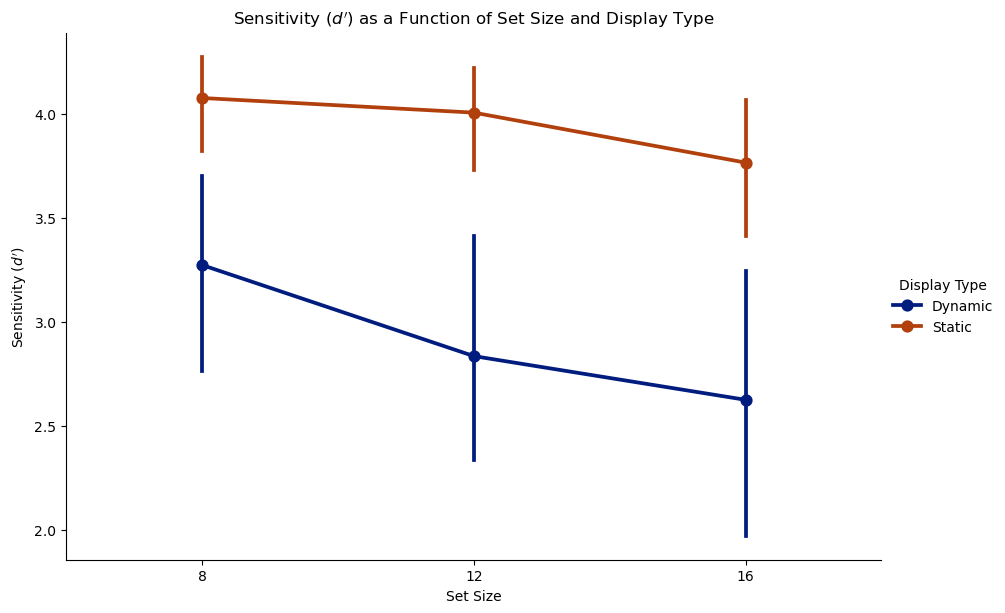

In [14]:
# Plot sensitivity (d') across set sizes for static and dynamic displays
g = sns.catplot(x='setsize', y='d_prime', hue='dyn', kind='point', data=conf_matrix, 
                height=6, aspect=1.5, markers='o', linestyles='-', palette='dark')

# Change the legend title
g._legend.set_title('Display Type')

# Add labels and title
plt.xlabel('Set Size')
plt.ylabel("Sensitivity ($d'$)")
plt.title('Sensitivity ($d\')$ as a Function of Set Size and Display Type')

plt.show()

#### Criterion ($C$)

Next, we plot the decision criterion ($C$) to examine participants’ response biases. A negative criterion indicates a liberal bias (favoring “target present” responses), while a positive criterion indicates a conservative bias (favoring “target absent” responses).

From the figure, we observe that participants tend to adopt a more liberal criterion (positive values) in the dynamic display condition compared to the static display condition. This suggests that participants are more willing in declaring “target present” when the display is dynamic.

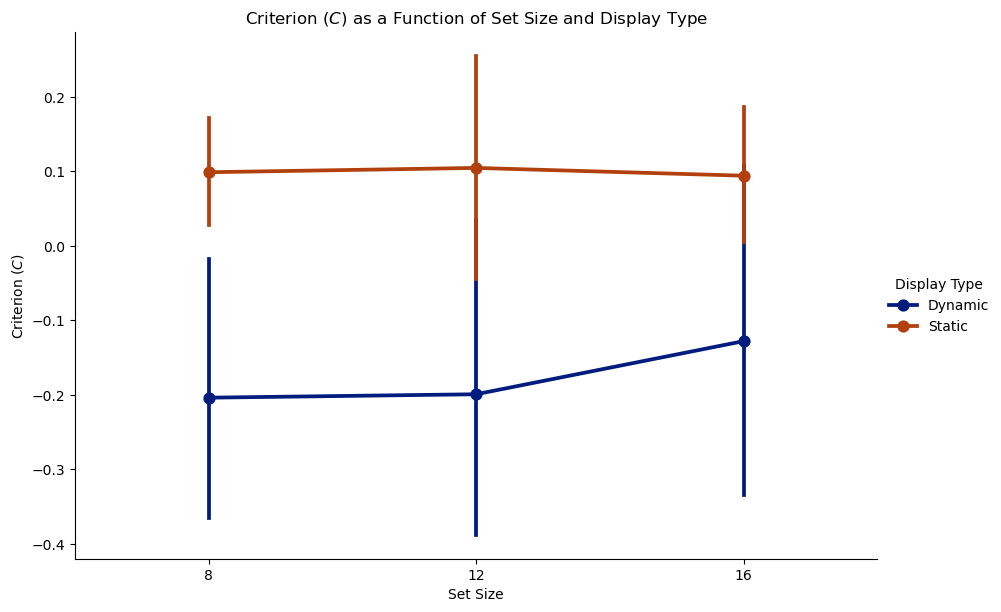

In [15]:
# Plot criterion (C) across set sizes for static and dynamic displays
g = sns.catplot(x='setsize', y='criterion', hue='dyn', kind='point', data=conf_matrix, 
                height=6, aspect=1.5, markers='o', linestyles='-', palette='dark')

# Change the legend title
g._legend.set_title('Display Type')

# Add labels and title
plt.xlabel('Set Size')
plt.ylabel("Criterion ($C$)")
plt.title('Criterion ($C$) as a Function of Set Size and Display Type')

plt.show()

As you can see from the above figure, participants tended to make more liberal responses in  dynamic search relative to static search. That is, they were more likely make 'target present' responses than 'target absent' responses. 

However, this was changed when we applied reward manipulation in Exp. 2. 

### Your practical task

Your practical task is to do similar analysis for Experiment 2. 

#### Experiment 2
The experimental paradigm was the same as in Experiment 1, with the following exceptions. We conducted two separate sessions. In one session, we rewared target-absent trials whenever the participant made a correct response of 'target absent', while leaving the target-present trials no reward. After each corrected response in the reward trial, a feedback was provided and told participants that they earned 1 more cent in this trial. In another session, we rewarded the target-presence trials.

**Summary of the manipulated factors**

- Target: Presence vs. Absence
- Set size: 8, 12, 16
- Display Type: Static vs. Dynamic (Block-wise)
- Reward: Target Presence, Absence (Session-wise)

**Data Information**

- Each condition was repeated 35 times
- Total trials: 2 x 3 x 2 x 35 x 2 = 840
- 12 Participants

Number of participants: 12
Missing values per column:
target     0
setsize    0
dyn        0
resp       0
rt         0
sub        0
reward     0
correct    0
dtype: int64


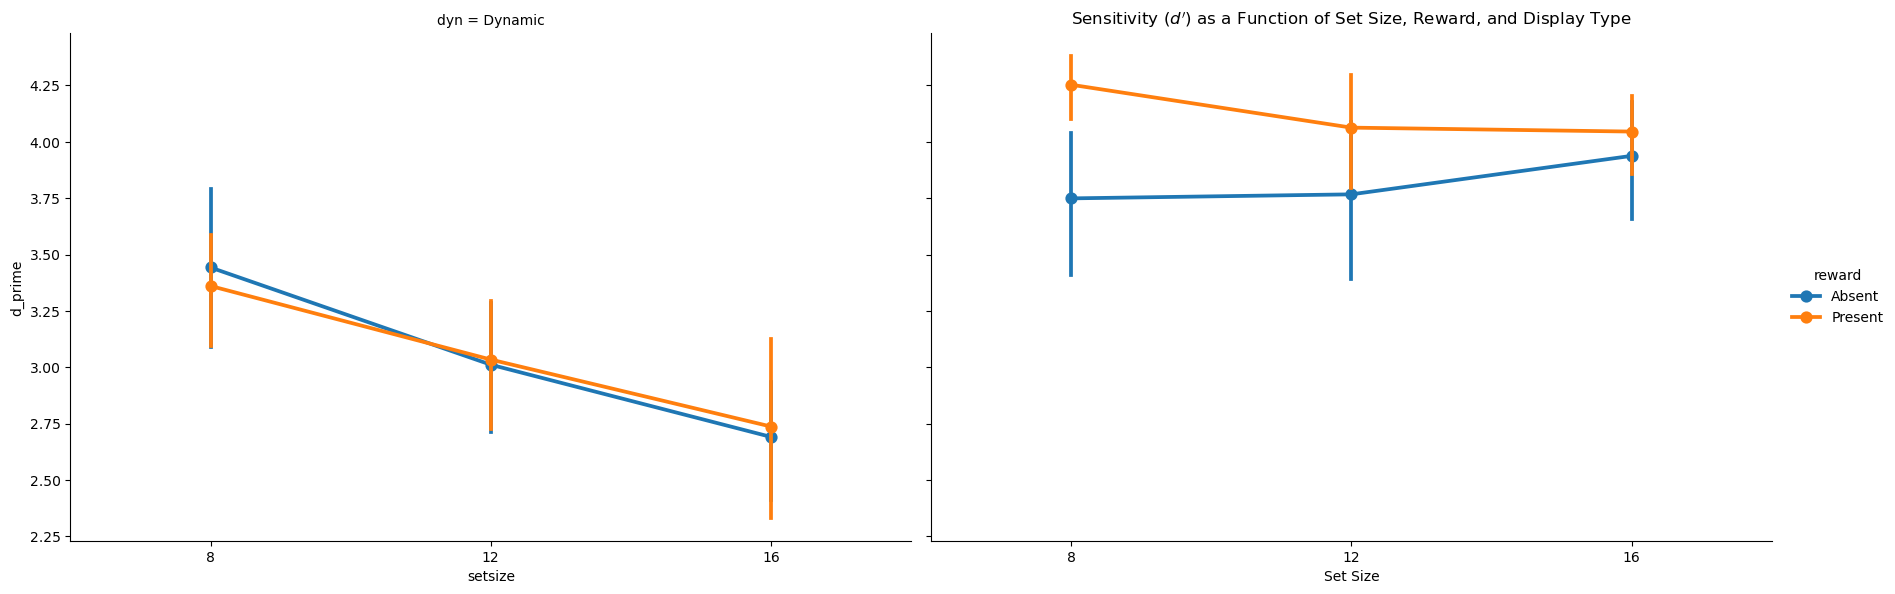

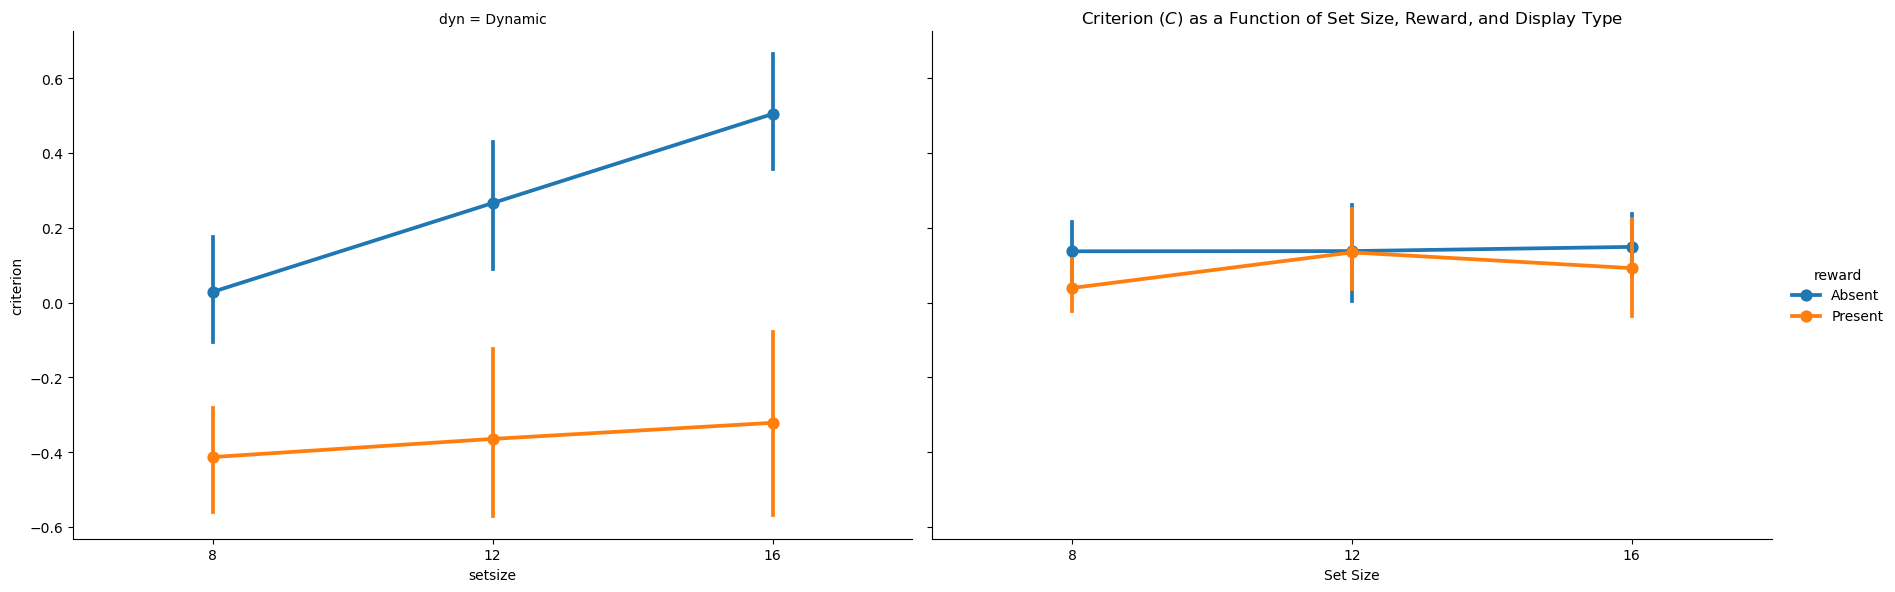

In [16]:
# Step 1: Load necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data
# Hint: Use pd.read_csv() and display the first few rows
url = 'https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp2.csv'
#dat = FIXME(url)
dat.head()

# Step 3: Data preprocessing
# Hint: Similar to Experiment 1, adjust the response values by subtracting 1 if necessary
# FIXME: Make sure the 'resp' column is coded as 0 and 1

# Step 4: Check basic information
# FIXME: Print the number of unique participants and check for missing values
# Hint: Use dat['sub'].nunique() and dat.isnull().sum()

# Step 5: Group data to calculate accuracy (mean correct responses) and trial count
# Group by participant, display type, target, set size, and reward condition

# Step 6: Apply correction for extreme accuracy values (0 or 1)
# FIXME: Apply the correction to 'correct_mean' using np.where
# Hint: Use the same correction formula from Experiment 1

# Step 7: Pivot data to wide format for confusion matrix
# FIXME: Use the pivot() function to create separate columns for target present and absent
# Hint: Similar to Experiment 1, pivot on the 'target' column and use 'pc_a' as values

# Step 8: Calculate d' and C
# FIXME: Compute z-scores for pc_present and pc_absent using norm.ppf()

# FIXME: Calculate d' and criterion using the appropriate formulas

# Step 9: Visualization of d' and C
# FIXME: Plot sensitivity (d') across set sizes for different reward and display conditions

# FIXME: Repeat the plot for criterion (C)


<details>
  <summary>Click to reveal the solution</summary>
  
  ```python
# Step 1: Load necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data
# FIXME: Load the data from the given URL into a DataFrame
# Hint: Use pd.read_csv() and display the first few rows
url = 'https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp2.csv'
dat = pd.read_csv(url)
dat.head()

# Step 3: Data preprocessing
# FIXME: Make sure the 'resp' column is coded as 0 and 1
# Hint: Similar to Experiment 1, adjust the response values by subtracting 1 if necessary
dat['resp'] = dat['resp'] - 1

# Step 4: Check basic information
# FIXME: Print the number of unique participants and check for missing values
# Hint: Use dat['sub'].nunique() and dat.isnull().sum()
print(f"Number of participants: {dat['sub'].nunique()}")
print("Missing values per column:")
print(dat.isnull().sum())

# Step 5: Group data to calculate accuracy (mean correct responses) and trial count
# Group by participant, display type, target, set size, and reward condition
macc = dat.groupby(['sub', 'dyn', 'target', 'setsize', 'reward']).agg({'correct': ['mean', 'count']})
macc.columns = macc.columns.map('_'.join)  # Flatten multi-level column names
macc = macc.reset_index()
macc.head()

# Step 6: Apply correction for extreme accuracy values (0 or 1)
# FIXME: Apply the correction to 'correct_mean' using np.where
# Hint: Use the same correction formula from Experiment 1
macc['pc_a'] = np.where(macc.correct_mean == 1, 1 - 0.5 / macc.correct_count,
                        np.where(macc.correct_mean == 0, 0.5 / macc.correct_count, macc.correct_mean))

# Step 7: Pivot data to wide format for confusion matrix
# FIXME: Use the pivot() function to create separate columns for target present and absent
# Hint: Similar to Experiment 1, pivot on the 'target' column and use 'pc_a' as values
conf_matrix = macc.pivot(index=['sub', 'dyn', 'setsize', 'reward'], columns='target', values='pc_a')
conf_matrix.columns = ['pc_absent', 'pc_present']
conf_matrix = conf_matrix.reset_index()
conf_matrix.head()

# Step 8: Calculate d' and C
# FIXME: Compute z-scores for pc_present and pc_absent using norm.ppf()
conf_matrix['z_present'] = norm.ppf(conf_matrix['pc_present'])
conf_matrix['z_absent'] = norm.ppf(conf_matrix['pc_absent'])

# FIXME: Calculate d' and criterion using the appropriate formulas
conf_matrix['d_prime'] = conf_matrix['z_present'] + conf_matrix['z_absent']
conf_matrix['criterion'] = - (conf_matrix['z_present'] - conf_matrix['z_absent']) / 2

# Step 9: Visualization of d' and C
# FIXME: Plot sensitivity (d') across set sizes for different reward and display conditions
sns.catplot(x='setsize', y='d_prime', hue='reward', col='dyn', kind='point', data=conf_matrix,
            height=6, aspect=1.5)
plt.xlabel('Set Size')
plt.ylabel("Sensitivity ($d'$)")
plt.title('Sensitivity ($d\')$ as a Function of Set Size, Reward, and Display Type')
plt.show()

# FIXME: Repeat the plot for criterion (C)
sns.catplot(x='setsize', y='criterion', hue='reward', col='dyn', kind='point', data=conf_matrix,
            height=6, aspect=1.5)
plt.xlabel('Set Size')
plt.ylabel("Criterion ($C$)")
plt.title('Criterion ($C$) as a Function of Set Size, Reward, and Display Type')
plt.show()
```
</details>